<a href="https://colab.research.google.com/github/valeman/False_prophet/blob/main/Debunking_false_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Failed prophet
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
# Install PyCaret time series
!pip install pycaret-ts-alpha

In [ ]:
import numpy as np
import pandas as pd

import time

import matplotlib.pyplot as plt

%matplotlib inline


from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from pycaret.time_series import *

In [ ]:
try: 
    data= pd.read_csv('https://raw.githubusercontent.com/valeman/False_prophet/main/medium_stats.csv')
except:
    print('Data loading error!')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [ ]:
data.set_index('Date', inplace = True)
data.asfreq('D')
data.head()

,Views
Date,
2018-07-02,21
2018-07-03,45
2018-07-04,31
2018-07-05,25
2018-07-06,31


In [ ]:
data.tail()

,Views
Date,
2019-03-17,3733
2019-03-18,6563
2019-03-19,7269
2019-03-20,5851
2019-03-21,5346


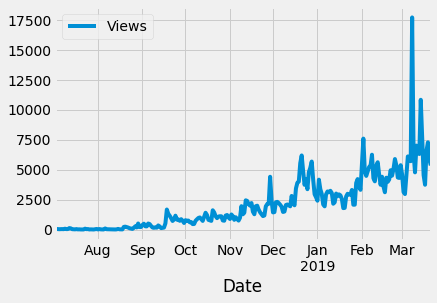

In [ ]:
plt.style.use("fivethirtyeight")

data.plot()
plt.legend(['Views'])
plt.show()

## **Available Models**

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data = data, fh=21, fold = 5, session_id = 123)
exp.models()

,Description,Value
0,session_id,123
1,Original Data,"(263, 1)"
2,Missing Values,False
3,Transformed Train Set,"(242,)"
4,Transformed Test Set,"(21,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,5
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


# Plotting Data

In [ ]:
# Without any argument, this will plot the original dataset
exp.plot_model()

In [ ]:
# ACF and PACF for the original dataset
exp.plot_model(plot="acf")

# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
exp.plot_model(plot="pacf", data_kwargs={'nlags':30, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

In [ ]:
exp.plot_model(plot="decomp_classical")
exp.plot_model(plot="decomp_classical", data_kwargs={'type': 'multiplicative'})
exp.plot_model(plot="decomp_stl")

In [ ]:
# Plot diagnostics
exp.plot_model(plot="diagnostics")

In [ ]:
# This will plot train test split
exp.plot_model(plot = 'train_test_split')

In [ ]:
# This will plot train test split
exp.plot_model(plot = 'cv')

# Benchmark Facebook Prophet

In [ ]:
data_train = data[:'2019-02-28']
data_train.tail()

,Views
Date,
2019-02-24,5875
2019-02-25,5351
2019-02-26,4335
2019-02-27,4301
2019-02-28,5364


In [ ]:
data_test = data[:'2019-03-01']
data_test.head()

,Views
Date,
2018-07-02,21
2018-07-03,45
2018-07-04,31
2018-07-05,25
2018-07-06,31


In [ ]:
best = exp.compare_models(turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,854.223,1139.53,0.2447,0.2699,-0.239,0.026
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,868.21,1152.3,0.2423,0.2732,-0.3176,0.028
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,868.21,1152.3,0.2423,0.2732,-0.3176,0.026
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,868.21,1152.3,0.2423,0.2732,-0.3176,0.026
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,868.21,1152.3,0.2423,0.2732,-0.3176,0.024
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,871.226,1156.83,0.244,0.2733,-0.3214,0.026
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,869.651,1151.89,0.2434,0.2744,-0.3163,0.028
polytrend,Polynomial Trend Forecaster,884.893,1209.24,0.2454,0.2784,-0.4425,0.012
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,893.726,1196.82,0.2502,0.2827,-0.3441,1.312
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,907.04,1187.29,0.2592,0.2843,-0.3775,0.028


In [ ]:
exp.check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,263
1,Summary,Statistics,Mean,,2101.06
2,Summary,Statistics,Median,,1396
3,Summary,Statistics,Standard Deviation,,2243.48
4,Summary,Statistics,Variance,,5.03319e+06
5,Summary,Statistics,Kurtosis,,8.47897
6,Summary,Statistics,Skewness,,2.00374
7,Summary,Statistics,# Distinct Values,,245
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",2615.48
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",3909.3


In [ ]:
exp.plot_model(best, plot = 'forecast')

In [ ]:
exp.plot_model(best, plot = 'residuals')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [ ]:
exp.plot_model(best, plot = 'diagnostics')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [ ]:
exp.predict_model(best, fh = 21)

2019-03-01    5096.4429
2019-03-02    4907.8624
2019-03-03    4776.6889
2019-03-04    4687.2439
2019-03-05    4628.1308
2019-03-06    4591.0656
2019-03-07    4570.0266
2019-03-08    4560.6370
2019-03-09    4559.7151
2019-03-10    4564.9483
2019-03-11    4574.6555
2019-03-12    4587.6149
2019-03-13    4602.9382
2019-03-14    4619.9799
2019-03-15    4638.2705
2019-03-16    4657.4691
2019-03-17    4677.3276
2019-03-18    4697.6657
2019-03-19    4718.3526
2019-03-20    4739.2929
2019-03-21    4760.4175
Freq: D, Name: Views, dtype: float64

In [ ]:
failed_prophet_model = exp.create_model("prophet")
y_predict = exp.predict_model(failed_prophet_model)
#### Plot Out-of-Sample Forecasts
exp.plot_model(failed_prophet_model)


,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2018-11-15,477.8737,739.8285,0.2112,0.2403,-0.1573
1,2018-12-06,1214.8001,1639.1115,0.3015,0.3699,-0.3646
2,2018-12-27,1365.4289,1458.4287,0.4987,0.3890,-2.2411
3,2019-01-17,1069.8949,1302.1211,0.3394,0.2949,0.1852
4,2019-02-07,626.8562,805.4225,0.1304,0.1359,-0.0816
Mean,NaT,950.9708,1188.9824,0.2962,0.2860,-0.5319
SD,NaT,341.8759,356.8964,0.1246,0.0920,0.8726


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Prophet,1830.504,3208.824,0.2424,0.2691,-0.1117


In [ ]:
tuned_failed_prophet_model = exp.tune_model(failed_prophet_model)

#### Plot Out-of-Sample Forecasts
exp.plot_model(tuned_failed_prophet_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2018-11-15,505.6714,779.3364,0.2184,0.2559,-0.2842
1,2018-12-06,1349.9630,1843.6085,0.3174,0.4224,-0.7264
2,2018-12-27,507.9828,831.3718,0.1488,0.1603,-0.0532
3,2019-01-17,1047.4288,1410.9954,0.2692,0.2810,0.0432
4,2019-02-07,803.7878,1106.4326,0.1562,0.1805,-1.0412
Mean,NaT,842.9668,1194.3489,0.2220,0.2600,-0.4123
SD,NaT,324.4587,395.0167,0.0649,0.0929,0.4116


## Roll back to February that is less volatile scenario

In [ ]:
data_stable = data[:'2019-02-28']
data_stable.tail()

,Views
Date,
2019-02-24,5875
2019-02-25,5351
2019-02-26,4335
2019-02-27,4301
2019-02-28,5364


In [ ]:
exp_stable = TimeSeriesExperiment()
exp_stable.setup(data = data_stable, fh=28, fold = 5, session_id = 123)
exp_stable.models()

,Description,Value
0,session_id,123
1,Original Data,"(242, 1)"
2,Missing Values,False
3,Transformed Train Set,"(214,)"
4,Transformed Test Set,"(28,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,5
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [ ]:
exp_stable.check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,242
1,Summary,Statistics,Mean,,1731.97
2,Summary,Statistics,Median,,1149.5
3,Summary,Statistics,Standard Deviation,,1718
4,Summary,Statistics,Variance,,2.95154e+06
5,Summary,Statistics,Kurtosis,,-0.011094
6,Summary,Statistics,Skewness,,0.950069
7,Summary,Statistics,# Distinct Values,,224
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",3086.15
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",4486.21


In [ ]:
best_stable = exp_stable.compare_models(turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,687.624,880.21,0.3425,0.4092,-0.8665,0.038
polytrend,Polynomial Trend Forecaster,669.498,867.842,0.3387,0.4114,-0.9544,0.012
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,695.448,890.715,0.3542,0.4191,-0.9455,0.178
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,671.633,860.842,0.338,0.4209,-0.9391,0.026
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,675.265,863.233,0.3401,0.4217,-0.9467,0.028
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,682.915,878.598,0.3456,0.4224,-0.9975,0.026
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,674.424,862.499,0.3377,0.4227,-0.9466,0.024
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,674.421,862.495,0.3377,0.4227,-0.9466,0.028
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,674.424,862.499,0.3377,0.4227,-0.9466,0.026
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,674.423,862.497,0.3377,0.4227,-0.9466,0.026


In [ ]:
exp_stable.plot_model(best_stable, plot = 'forecast')

In [ ]:
failed_prophet_model = exp_stable.create_model("prophet")
y_predict_stable = exp_stable.predict_model(failed_prophet_model)
#### Plot Out-of-Sample Forecasts
exp_stable.plot_model(failed_prophet_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2018-09-13,464.0975,548.7411,0.5896,0.7962,-1.7199
1,2018-10-11,210.9708,280.7313,0.1935,0.2077,-0.4984
2,2018-11-08,653.2675,876.0653,0.2921,0.3632,-0.9274
3,2018-12-06,1197.0379,1611.8887,0.2929,0.3602,-0.4674
4,2019-01-03,1609.0479,1689.2936,0.6370,0.4603,-6.9230
Mean,NaT,826.8843,1001.3440,0.4010,0.4375,-2.1072
SD,NaT,507.9173,563.1814,0.1777,0.1967,2.4499


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Prophet,1009.7237,1350.167,0.1888,0.2197,-1.3141
